In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline

import scipy.stats as stats 
import random

### **Applying Hypothesis Test for Population Mean**

# 1. when population standard deviation is known

It is rarely the case when you know the population standard deviation and not the mean but let's assume that is the case.

**Business Problem 1**

*It is known from experience that for airlines companies the mean flight time from South Africa to Australia is 5.5 hours with a standard deviation of 1.3 hour.*

*a certain airlines company is afraid that they are is slipping and collect a random sample of 45 flights. The mean flight time of these samples comes out to be 6.45 hours.*

*Is there enough statistical evidence for the company’s apprehension that their mean flight time from South Africa to Australia is greater than 5.5 hours?*

Use level of significance 𝛼 = 0.05.

## One-tail Test

Let $\mu$ be the mean flight time of the trip.

The company will test the null hypothesis

>$H_0: \mu = 5.5$ hours

against the alternate hypothesis

> $H_a: \mu > 5.5$ hours

### Are the assumptions of the Z-test satisfied?

- Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
- Observations are from a simple random sample - we are informed that the company collected a simple random sample.
- Standard deviation is known - Yes.

### Find the Z test statistic

In [3]:
mu, sigma = 5.5, 1.3

x_bar = 6.45

test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
round(test_stat, 2)

4.9

**Insight**

*means that AVG of sample flight time is 4.9 above the AVG of population flight time.*

### The Z test statistic follows a standard normal distribution.

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

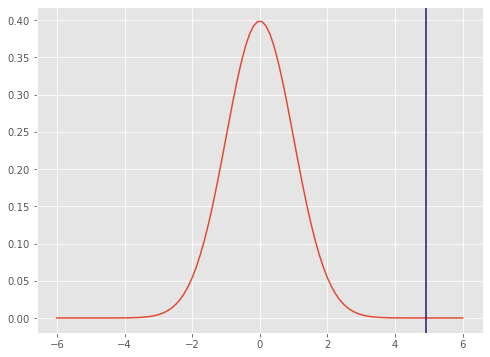

In [4]:
from scipy.stats import norm

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
x = np.linspace(-6, 6, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = '#191970')
plt.show()

As showen above the z-test statistic is far away from the middle, at the end (the tails)..

### The probability of getting the calculated value of test statistic or bigger in the above distribution

In [5]:
1 - norm.cdf(test_stat)

4.7396938662735977e-07

*There's very small chance(0.0000004739)  that the average flight time will more than by 4.9 of the average flight time that the null hypothesis says*

### Rejection Vs. Acceptance Region/ p-value

Though the probability is very small, we can not conclude whether the evidence is significant enough to reject the null hypothesis in favor of the alternate hypothesis or not. To determine it, we use either one of the following approaches:

- Rejection region approach

- p-value approach

In this given situation, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z value lying at the right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of 𝛼 to the right end.

#### 1.Rejection Region Approach

In [6]:
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-.05)#always 1-alpha for the right region when my z-score (test statistic) = positive number
critical_val#threshold value

1.6448536269514722

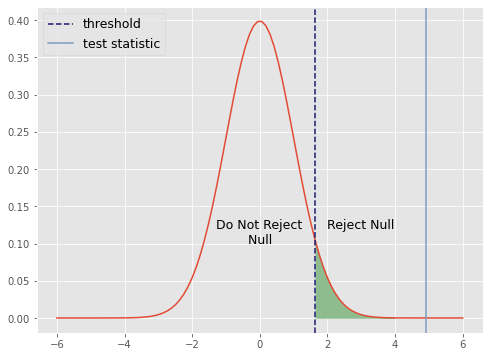

In [7]:
plt.figure(figsize=(8,6))
x = np.linspace(-6, 6, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = '#191970', linestyle='--', label='threshold')
plt.axvline(x = test_stat, c = '#7D9EC0', label='test statistic')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='#8FBC8F')
plt.annotate('Reject Null', (2, 0.12), fontsize=12.5)
plt.annotate('Do Not Reject\n        Null', (-1.3, 0.10), fontsize=12.5)
plt.legend(fontsize=12.5)
plt.show()

*when the true mean = 0, there's only 5% of being more than 1.64, in simple words, being in the left side of my threshold value means I'm outside the rejection region, but being in the right side of my threshold value means I'm inside the rejection region of null hyobethesis.*

**Insight**

- As our test statistic **(4.9)** does lie in the rejection region, we can reject the null hypothesis in favor of the alternative hypothesis. Thus, we have enough statistical evidence to say that the mean flight time of the trip is greater than 5.5 hours.

#### 2. P-value Approach

- Though the rejection region approach gives us the desired conclusion, it does not say anything about the strength of the evidence. Hence, statisticians prefer the p-value approach which measures the strength of the evidence against the null hypothesis.
- The p-value is the probability of finding the observed test statistic or more extreme results, under the null hypothesis. 

In [8]:
p_val = 1 - norm.cdf(test_stat)
p_val    #true number = (0.0000004739) 

4.7396938662735977e-07

Since our p-value is much small (less than our level of significant = 0.05), we will reject the null hypothesis in favor of the alternative hypothesis, we have a statistical evidence against the null

### **Conclusion**

- The mean flight time from South Africa to Australia is no longer 5.5 hours , the company was right, they were slipping in the flight time and they have statistical evidence that supports their claim ..

-  In business context the company should start to worry about the increment in the mean flight time and investigate more about the reasons that lead to this, and that doesn't happen due to extremes in the sample drawn, when sample may have some of historical casual accidents that led to this result, in this situation they can draw another sample and do the test again , but if they come up with the same result that means the company does have some serious issues that cause this slipping in the mean flight time..

**Business Problem 2**

*A product manager of Adidas, wants to Launch a new product line in a UK market area. A survey of a random sample of 290 households in that market showed a mean income of £32300 per household. The standard deviation based on an earlier pilot study is £8300. the product manager strongly believes that the product line will be adequately profitable only in markets where the mean household income is greater than £30500. product manager wants your help in deciding whether the product line should be introduced in the new market. Perform statistical analysis with a significance level of 0.05 and conclude.*

Null Hypothesis: The mean income of households is less than or equal to £30500 

$ H_o: \mu\leq £ 30500 $

Alternate Hypothesis: The mean income of households is greater than £30500

$ H_a: \mu > £ 30500 $

### Are the assumptions of the Z-test satisfied?

- Samples are drawn from a normal distribution - Since the sample size is 290 (which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
- Observations are from a simple random sample - we are informed that the company collected a simple random sample.
- Standard deviation is known - Yes.

### Find the z-test statistic

In [9]:
mu, sigma = 30500, 8300

x_bar = 32300

test_stat = (x_bar - mu) / (sigma/np.sqrt(290))
round(test_stat, 2)

3.69

### Find the p-value

In [10]:
p_val = 1 - norm.cdf(test_stat)
p_val    

0.00011075974173879732

The p-value is equal to 0.00011 which is less than the significance level of 0.05, we reject the null hypothesis and conclude that the mean income of households is greater than £30500.

### **Conclusion**

- With 95% confidence we conclude that we have enough statistical evidence to say that mean income of household in UK is more than £30500.
- The product manager was right about her belief , as the mean income of a household  is more than £30500, the new product line will be profitable in the UK market.

## Two-tail Test

**Business Problem**

*It is known from experience that the mean amount of shampoo in a bottle is 250 ml with a standard deviation of 50 ml.*

*Suppose the quality control team of the company wants to make sure the mean amount of the shampoo in all the bottles is 250 ml, they have collected 36 randomly sampled bottles.* 

*The mean amount of shampoo in the 36 samples is 234 ml.*

*So we intend help the company quality team to test whether the amount of shampoo in the bottle is different from 250 ml using a 0.05 level of significance. Do we have enough Statistical evidence for it?*


The null hypothesis formed by the quality control team is

>$H_0: \mu = 250$ ml

against the alternative hypothesis

> $H_a: \mu \neq 250$ ml

### Are the assumptions of the Z-test satisfied?

- Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
- Observations are from a simple random sample - we are informed that the company collected a simple random sample.
- Standard deviation is known - Yes.

### Find the Z test statistic

In [11]:
mu, sigma = 250, 50

x_bar = 234

test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
round(test_stat, 2)

-1.92

### Rejection Vs. Acceptance Region/ p-value

#### 1. The rejection region approach for the two-tailed test

In [12]:
# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))#right side 1 - alpha , divide by 2 >> two-tail test
critical_val2 = norm.ppf(0.05/2)#left side alpha / 2 >> two-tail test

critical_val1, critical_val2

(1.959963984540054, -1.9599639845400545)

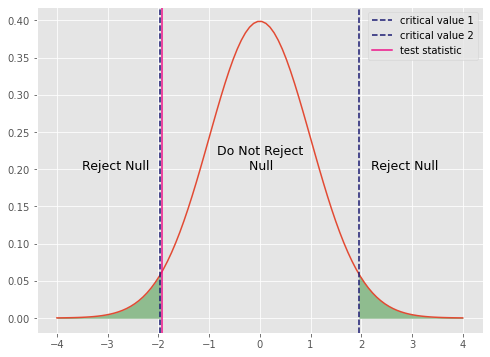

In [13]:
from scipy.stats import norm

plt.figure(figsize=(8,6))
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val1, linestyle='--', c = '#191970', label='critical value 1')
x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='#8FBC8F')
plt.axvline(x = critical_val2, linestyle='--', c = '#191970', label='critical value 2')
x1 = np.linspace(-4, critical_val2, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='#8FBC8F')
plt.axvline(x = test_stat, c = '#EE1289', label='test statistic')
plt.annotate('Reject Null', (2.2, 0.20), fontsize=12.5)
plt.annotate('Reject Null', (-3.5, 0.20), fontsize=12.5)
plt.annotate('  Do Not Reject\n          Null', (-1, 0.20), fontsize=12.5)
plt.legend()
plt.show()

As our test statistic **(-1.92)** lies ouside the rejection region (it's very close to the threshold value - the rejection region), we can't reject the null hypothesis. Thus, we don't have enough statistical evidence to say that the mean amount of shampoo in the bottle is different from 250 ml.

#### 2. The p-value approach for the two-tailed test

In [14]:
p_val = stats.norm.sf(abs(test_stat))*2
p_val

0.054857899407673605

A p-value of 0.054 is greater than level of significant = 0.05. 

We don't have a significant evidence to say the mean amount of shampoo bottle is diffrenet from the mean amount of 250 ml, thus we failed to reject the null hypothesis, the mean amount of shampoo bottles is 250 ml.

### **Conclusion**

- We are 95% sure that the mean amount of the shampoo bottles is 250 ml, the mean amount could differ from bottle to bottle but not more than 5% of 250 ml..

- In other words, it's not necessarily the mean amount of shampoo in the bottles that is exactly 250 ml, it could be less than that, but not by a huge observed difference from 250 ml in which the quality team should take in consideration ..

# OR

We could re-formulate the claim to come up to one-tail test..

## One-tail Test

**Business Problem 3**

*It is known from experience that the mean amount of shampoo in a bottle is 250 ml with a standard deviation of 50 ml.*

*Suppose there's a customer who claimed that the mean amount  of the shampoo in the bottles is less than  250 ml ,  so we have collected 36 randomly sampled bottles.*

*The mean amount of shampoo in the 36 samples is 234 ml.*

*So we intend help the quality team to test if the customer is right about  the mean amount of shampoo in the bottle is less than from 250 ml or not, using a 0.05 level of significance. Do we have enough Statistical evidence for it?*

The null hypothesis 

>$H_0: \mu = 250$ ml

against the alternative hypothesis

> $H_a: \mu < 250$ ml

### Are the assumptions of the Z-test satisfied?

- Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
- Observations are from a simple random sample - we are informed that the company collected a simple random sample.
- Standard deviation is known - Yes.

### Find the Z test statistic

In [15]:
mu, sigma = 250, 50

x_bar = 234

test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
round(test_stat, 2)

-1.92

### Rejection Vs. Acceptance Region/ p-value

#### 1. The rejection region approach 

In [16]:
# find the critical values
critical_val = norm.ppf(0.05)
critical_val

-1.6448536269514729

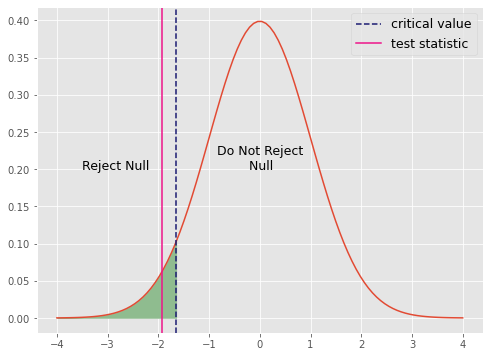

In [17]:
from scipy.stats import norm

plt.figure(figsize=(8,6))
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, linestyle='--', c = '#191970', label='critical value')
x1 = np.linspace(-4, critical_val, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='#8FBC8F')
plt.axvline(x = test_stat, c = '#EE1289', label='test statistic')
plt.annotate('Reject Null', (-3.5, 0.20), fontsize=12.5)
plt.annotate('  Do Not Reject\n          Null', (-1, 0.20), fontsize=12.5)
plt.legend(fontsize=12.5)
plt.show()

As our test statistic **(-1.92)** lies inside the rejection region, we can reject the null hypothesis. Thus, we do have enough statistical evidence to say that the mean amount of shampoo in the bottle is less than 250 ml.

In [18]:
p_val = stats.norm.sf(abs(test_stat))
p_val

0.027428949703836802

A p-value of 0.027 is less than level of significant = 0.05. 

We do have a significant evidence to say the mean amount of shampoo bottle is less than the mean amount of 250 ml, thus we reject the null hypothesis in favor of the alternative hypothesis, the mean amount of shampoo bottles is less than 250 ml.

### **Conclusion**

- The company quality team known that the customer was right about his/her claim from the result of the previous two-tail hypothesis test , the mean amount of the shampoo in the bottles is not necessarily is exactly 250 ml and it could be differ from bottle to the other, however since they are not below the mean amount of 250 ml by significant observed difference, then there’s no need to start to be worried..